# PRINCIPLES OF ARTIFICIAL INTELLIGENCE (ISB 46703)
## PROJECT SUBMISSION

GROUP MEMBERS
1. AHMAD SUFIAN BIN AHMAD SYAHRIZAL(52215121160) L01-B03
2. MUHAMMAD SYAFIQ IKHWAN BIN MOHD NORHISHAM (52215121121) - L01-B02
3. MOHAMAD SYAZWAN BIN MOHD SHUKRI (52215121161) L01-B03

## Loading Data & Splitting

In [1]:
import os
import shutil
import random
from sklearn.model_selection import train_test_split
from PIL import Image

In [3]:
# Dataset's path
base_path = r"C:\Users\User\Downloads\Mini Project\Mini Project\Dataset\combined dataset 21" 

# loading dataset and removing corrupted files
def load_dataset(base_path):
    dataset = []
    try:
        subspecies = os.listdir(base_path)
        for subspecies_name in subspecies:
            subspecies_path = os.path.join(base_path, subspecies_name)
            if os.path.isdir(subspecies_path):
                for img_name in os.listdir(subspecies_path):
                    img_path = os.path.join(subspecies_path, img_name)
                    try:
                        with Image.open(img_path) as img:
                            dataset.append((img_path, subspecies_name))
                    except (IOError, OSError) as e:
                        print(f"Removing corrupted file {img_path}: {e}")
                        os.remove(img_path)
    except FileNotFoundError as e:
        print(f"Error: {e}")
    return dataset

# Saving images
def save_images(dataset, base_path):
    for img_path, subspecies_name in dataset:
        subspecies_dir = os.path.join(base_path, subspecies_name)
        os.makedirs(subspecies_dir, exist_ok=True)
        shutil.copy(img_path, subspecies_dir)


dataset = load_dataset(base_path)


random.shuffle(dataset)


# Split dataset
train_val_split = 0.7
val_test_split = 0.5  

labels = [label for _, label in dataset]
train_val, test = train_test_split(dataset, train_size=train_val_split, stratify=labels)
train_labels = [label for _, label in train_val]
train, val = train_test_split(train_val, test_size=val_test_split, stratify=train_labels)

# Paths to save splitted datasets
test_path = r"C:\Users\User\Downloads\Mini Project\Mini Project\Dataset\Dataset 21\test"
train_path = r"C:\Users\User\Downloads\Mini Project\Mini Project\Dataset\Dataset 21\train"
val_path = r"C:\Users\User\Downloads\Mini Project\Mini Project\Dataset\Dataset 21\val"

# Save splitted datasets
save_images(train, train_path)
save_images(val, val_path)
save_images(test, test_path)

print("Datasets have been split and saved successfully!")

Datasets have been split and saved successfully!


## Buil and Train Models

In [5]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50, DenseNet121, MobileNetV3Small
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [8]:
test_path = r"C:\Users\User\Downloads\Mini Project\Mini Project\Dataset\Dataset 21\test"
train_path = r"C:\Users\User\Downloads\Mini Project\Mini Project\Dataset\Dataset 21\train"
val_path = r"C:\Users\User\Downloads\Mini Project\Mini Project\Dataset\Dataset 21\val"

# Image data generators
train_datagen = ImageDataGenerator(rescale=1./255, horizontal_flip=True, zoom_range=0.2, shear_range=0.2)
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_path, target_size=(224, 224), batch_size=32, class_mode='categorical')
val_generator = val_datagen.flow_from_directory(val_path, target_size=(224, 224), batch_size=32, class_mode='categorical')
test_generator = test_datagen.flow_from_directory(test_path, target_size=(224, 224), batch_size=32, class_mode='categorical')

# Model build
def build_model(base_model):
    model = Sequential([
        base_model,
        GlobalAveragePooling2D(),
        Dense(256, activation='relu'),
        Dense(train_generator.num_classes, activation='softmax')
    ])
    return model




Found 1245 images belonging to 10 classes.
Found 1246 images belonging to 10 classes.
Found 1068 images belonging to 10 classes.


In [11]:
# ResNet50
resnet50_base = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
resnet50_model = build_model(resnet50_base)
resnet50_model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# DenseNet121
densenet121_base = DenseNet121(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
densenet121_model = build_model(densenet121_base)
densenet121_model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# MobileNetV3
mobilenetv3_base = MobileNetV3Small(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
mobilenetv3_model = build_model(mobilenetv3_base)
mobilenetv3_model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Callbacks
callbacks = [
    EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True),
    ModelCheckpoint('model_checkpoint.h5', save_best_only=True)
]

In [12]:
# Training ResNet50
resnet50_history = resnet50_model.fit(train_generator, validation_data=val_generator, epochs=25, callbacks=callbacks)

Epoch 1/25


39/39 [==============================] - ETA: 0s - loss: 2.3253 - accuracy: 0.2819 

C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


39/39 [==============================] - 597s 14s/step - loss: 2.3253 - accuracy: 0.2819 - val_loss: 135.0009 - val_accuracy: 0.1316
Epoch 2/25
39/39 [==============================] - 460s 12s/step - loss: 1.8739 - accuracy: 0.3470 - val_loss: 62.1717 - val_accuracy: 0.1565
Epoch 3/25
39/39 [==============================] - 310s 8s/step - loss: 1.7240 - accuracy: 0.4305 - val_loss: 16.6345 - val_accuracy: 0.1565
Epoch 4/25
39/39 [==============================] - 214s 5s/step - loss: 1.5162 - accuracy: 0.4900 - val_loss: 3.0389 - val_accuracy: 0.1372
Epoch 5/25
39/39 [==============================] - 220s 6s/step - loss: 1.3960 - accuracy: 0.5149 - val_loss: 3.2155 - val_accuracy: 0.0875
Epoch 6/25
39/39 [==============================] - 226s 6s/step - loss: 1.2571 - accuracy: 0.5815 - val_loss: 3.0382 - val_accuracy: 0.1372
Epoch 7/25
39/39 [==============================] - 219s 6s/step - loss: 1.1388 - accuracy: 0.6305 - val_loss: 4.3557 - val_accuracy: 0.0875
Epoch 8/25
39/39 [

In [13]:
# Training DenseNet121
densenet121_history = densenet121_model.fit(train_generator, validation_data=val_generator, epochs=25, callbacks=callbacks)

Epoch 1/25
39/39 [==============================] - 223s 5s/step - loss: 1.9971 - accuracy: 0.3502 - val_loss: 3.8028 - val_accuracy: 0.2063
Epoch 2/25
39/39 [==============================] - 195s 5s/step - loss: 1.4940 - accuracy: 0.4908 - val_loss: 5.4440 - val_accuracy: 0.1388
Epoch 3/25
39/39 [==============================] - 195s 5s/step - loss: 1.3029 - accuracy: 0.5639 - val_loss: 7.3014 - val_accuracy: 0.1894
Epoch 4/25
39/39 [==============================] - 195s 5s/step - loss: 1.1587 - accuracy: 0.6129 - val_loss: 4.0196 - val_accuracy: 0.2994
Epoch 5/25
39/39 [==============================] - 193s 5s/step - loss: 1.0049 - accuracy: 0.6675 - val_loss: 2.5154 - val_accuracy: 0.3860
Epoch 6/25
39/39 [==============================] - 195s 5s/step - loss: 0.8635 - accuracy: 0.7108 - val_loss: 2.5069 - val_accuracy: 0.4157
Epoch 7/25
39/39 [==============================] - 196s 5s/step - loss: 0.7284 - accuracy: 0.7542 - val_loss: 2.7301 - val_accuracy: 0.3547
Epoch 8/25
39

In [48]:
# Training MobileNetV3
mobilenetv3_history = mobilenetv3_model.fit(train_generator, validation_data=val_generator, epochs=25, callbacks=callbacks)

Epoch 1/25
39/39 [==============================] - 33s 847ms/step - loss: 0.0265 - accuracy: 0.9904 - val_loss: 10.5303 - val_accuracy: 0.0875
Epoch 2/25
39/39 [==============================] - 32s 816ms/step - loss: 0.0339 - accuracy: 0.9904 - val_loss: 12.1344 - val_accuracy: 0.1372
Epoch 3/25
39/39 [==============================] - 34s 863ms/step - loss: 0.0471 - accuracy: 0.9871 - val_loss: 11.8139 - val_accuracy: 0.1372
Epoch 4/25
39/39 [==============================] - 32s 828ms/step - loss: 0.0610 - accuracy: 0.9799 - val_loss: 13.6072 - val_accuracy: 0.0875
Epoch 5/25
39/39 [==============================] - 32s 832ms/step - loss: 0.0605 - accuracy: 0.9847 - val_loss: 12.4035 - val_accuracy: 0.0875
Epoch 6/25
39/39 [==============================] - 33s 836ms/step - loss: 0.0334 - accuracy: 0.9904 - val_loss: 13.5851 - val_accuracy: 0.0875
Epoch 7/25
39/39 [==============================] - 33s 835ms/step - loss: 0.0269 - accuracy: 0.9888 - val_loss: 20.2545 - val_accuracy:

## Model Accuracy

In [18]:
import matplotlib.pyplot as plt

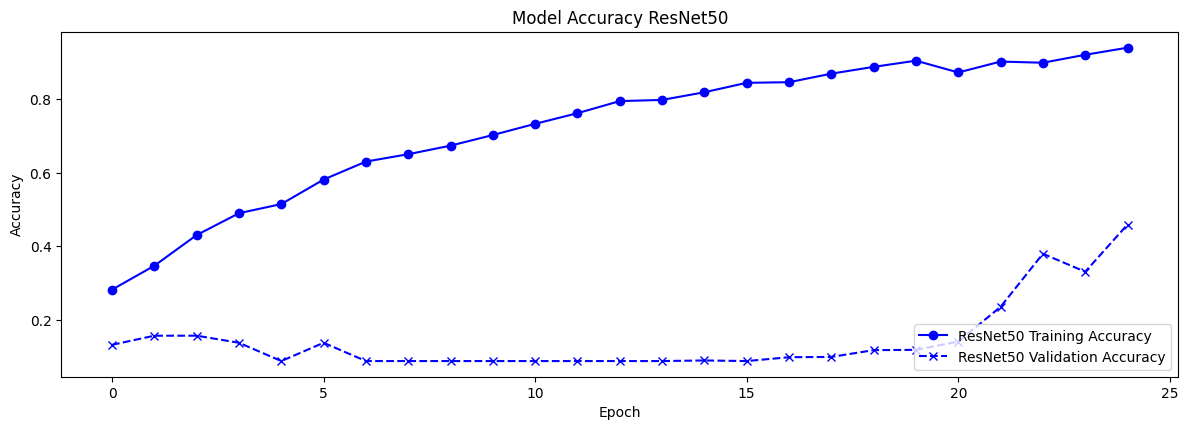

In [45]:
# Plotting model accuracy
plt.figure(figsize=(12, 8))
plt.subplot(2, 1, 1)
plt.plot(resnet50_history.history['accuracy'], label='ResNet50 Training Accuracy', linestyle='-', marker='o', color='b')
plt.plot(resnet50_history.history['val_accuracy'], label='ResNet50 Validation Accuracy', linestyle='--', marker='x', color='b')
plt.title('Model Accuracy ResNet50')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

plt.tight_layout()
plt.show()

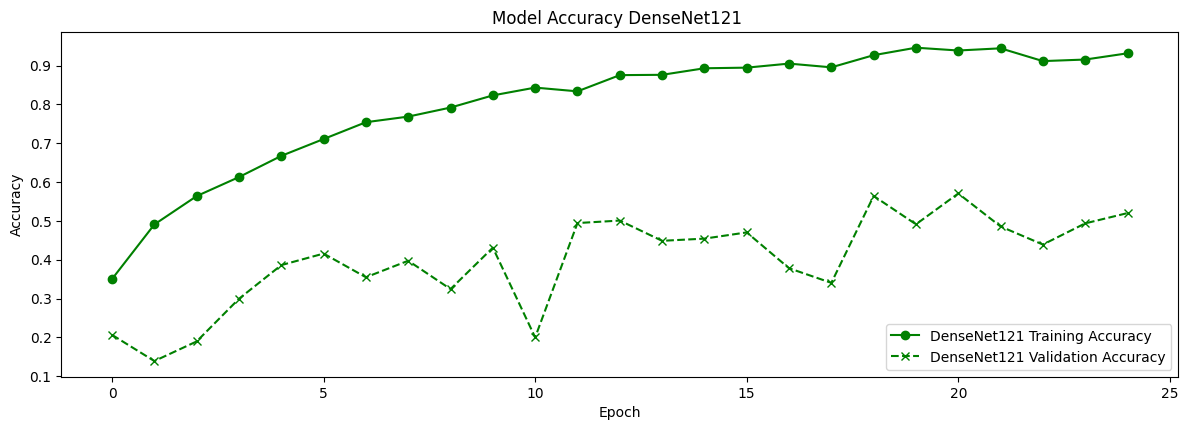

In [44]:
# Plotting model accuracy
plt.figure(figsize=(12, 8))
plt.subplot(2, 1, 1)
plt.plot(densenet121_history.history['accuracy'], label='DenseNet121 Training Accuracy', linestyle='-', marker='o', color='g')
plt.plot(densenet121_history.history['val_accuracy'], label='DenseNet121 Validation Accuracy', linestyle='--', marker='x', color='g')
plt.title('Model Accuracy DenseNet121 ')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

plt.tight_layout()
plt.show()

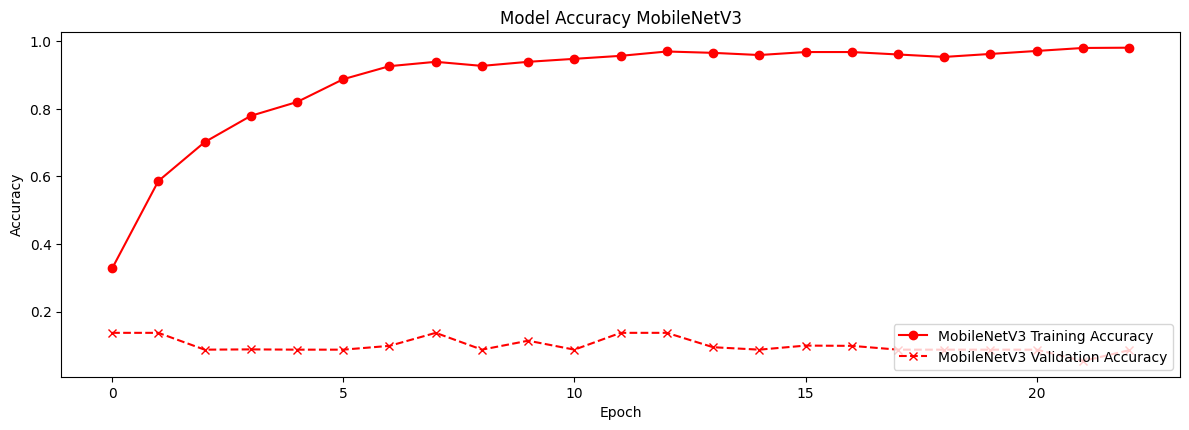

In [62]:
# Plotting model accuracy
plt.figure(figsize=(12, 8))
plt.subplot(2, 1, 1)
plt.plot(mobilenetv3_history.history['accuracy'], label='MobileNetV3 Training Accuracy', linestyle='-', marker='o', color='r')
plt.plot(mobilenetv3_history.history['val_accuracy'], label='MobileNetV3 Validation Accuracy', linestyle='--', marker='x', color='r')
plt.title('Model Accuracy MobileNetV3')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

plt.tight_layout()
plt.show()

## Model Loss

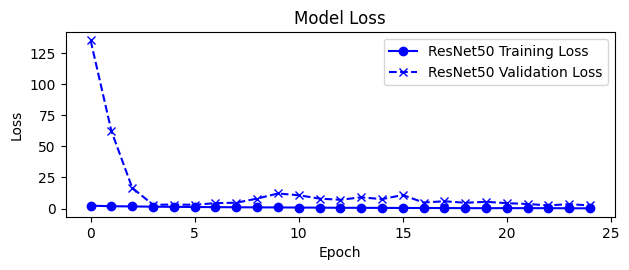

In [42]:
# Plotting model loss
plt.subplot(2, 1, 2)
plt.plot(resnet50_history.history['loss'], label='ResNet50 Training Loss', linestyle='-', marker='o', color='b')
plt.plot(resnet50_history.history['val_loss'], label='ResNet50 Validation Loss', linestyle='--', marker='x', color='b')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')

plt.tight_layout()
plt.show()

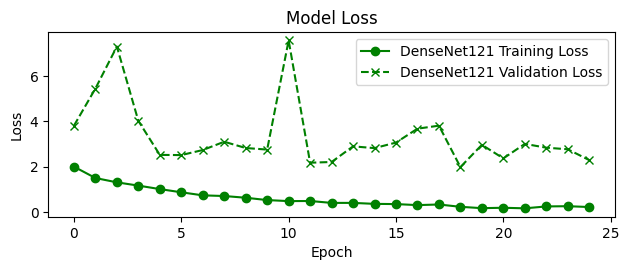

In [64]:
# Plotting model loss
plt.subplot(2, 1, 2)
plt.plot(densenet121_history.history['loss'], label='DenseNet121 Training Loss', linestyle='-', marker='o', color='g')
plt.plot(densenet121_history.history['val_loss'], label='DenseNet121 Validation Loss', linestyle='--', marker='x', color='g')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')

plt.tight_layout()
plt.show()

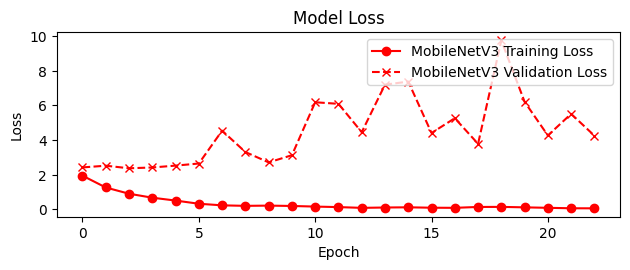

In [63]:
# Plotting model loss
plt.subplot(2, 1, 2)
plt.plot(mobilenetv3_history.history['loss'], label='MobileNetV3 Training Loss', linestyle='-', marker='o', color='r')
plt.plot(mobilenetv3_history.history['val_loss'], label='MobileNetV3 Validation Loss', linestyle='--', marker='x', color='r')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')

plt.tight_layout()
plt.show()

## Evaluate Models (Visualize)

In [25]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

In [28]:
def evaluate_model(model, test_generator, model_name):
    test_loss, test_acc = model.evaluate(test_generator)
    print(f"Test Accuracy: {test_acc:.4f}")
    print(f"Test Loss: {test_loss:.4f}")

    # Confusion matrix
    Y_pred = model.predict(test_generator)
    y_pred = np.argmax(Y_pred, axis=1)
    y_true = test_generator.classes

    cm = confusion_matrix(y_true, y_pred)
    cr = classification_report(y_true, y_pred, target_names=test_generator.class_indices.keys())

    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=test_generator.class_indices.keys(), yticklabels=test_generator.class_indices.keys())
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(f'{model_name} Confusion Matrix')
    plt.show()

    print("Classification Report:\n", cr)

ResNet50 Evaluation
34/34 [==============================] - 40s 1s/step - loss: 2.4507 - accuracy: 0.4551
Test Accuracy: 0.4551
Test Loss: 2.4507
34/34 [==============================] - 41s 1s/step


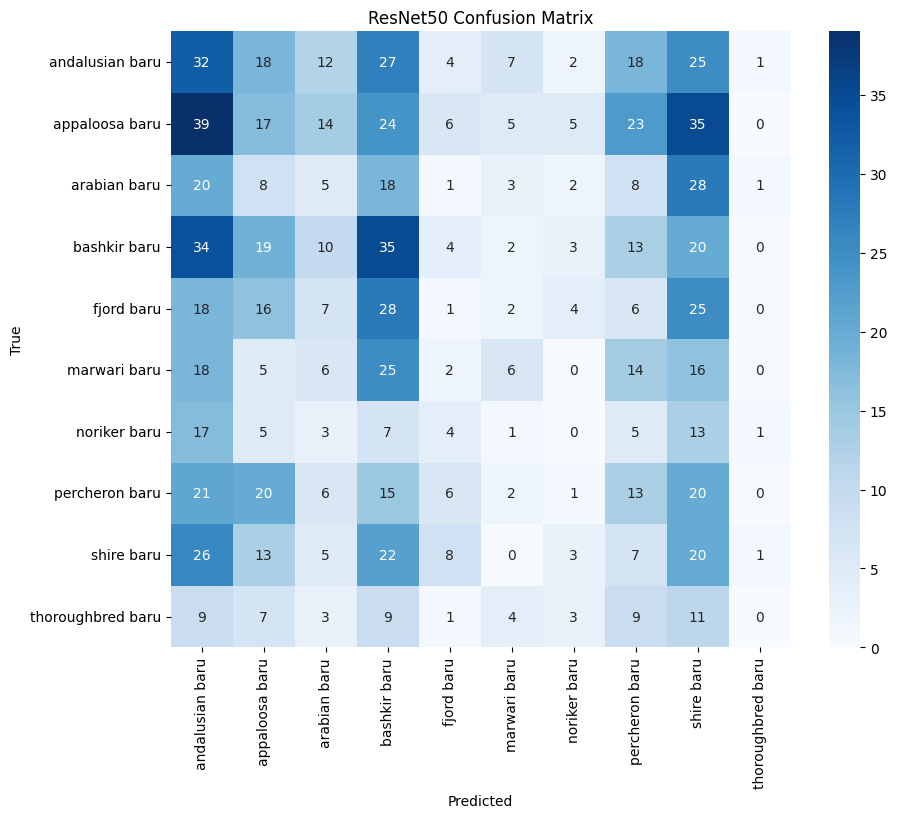

Classification Report:
                    precision    recall  f1-score   support

  andalusian baru       0.14      0.22      0.17       146
   appaloosa baru       0.13      0.10      0.11       168
     arabian baru       0.07      0.05      0.06        94
     bashkir baru       0.17      0.25      0.20       140
       fjord baru       0.03      0.01      0.01       107
     marwari baru       0.19      0.07      0.10        92
     noriker baru       0.00      0.00      0.00        56
   percheron baru       0.11      0.12      0.12       104
       shire baru       0.09      0.19      0.13       105
thoroughbred baru       0.00      0.00      0.00        56

         accuracy                           0.12      1068
        macro avg       0.09      0.10      0.09      1068
     weighted avg       0.11      0.12      0.11      1068



In [29]:
# Evaluate ResNet50
print("ResNet50 Evaluation")
evaluate_model(resnet50_model, test_generator, 'ResNet50')

DenseNet121 Evaluation
34/34 [==============================] - 36s 1s/step - loss: 2.2014 - accuracy: 0.5243
Test Accuracy: 0.5243
Test Loss: 2.2014
34/34 [==============================] - 36s 1s/step


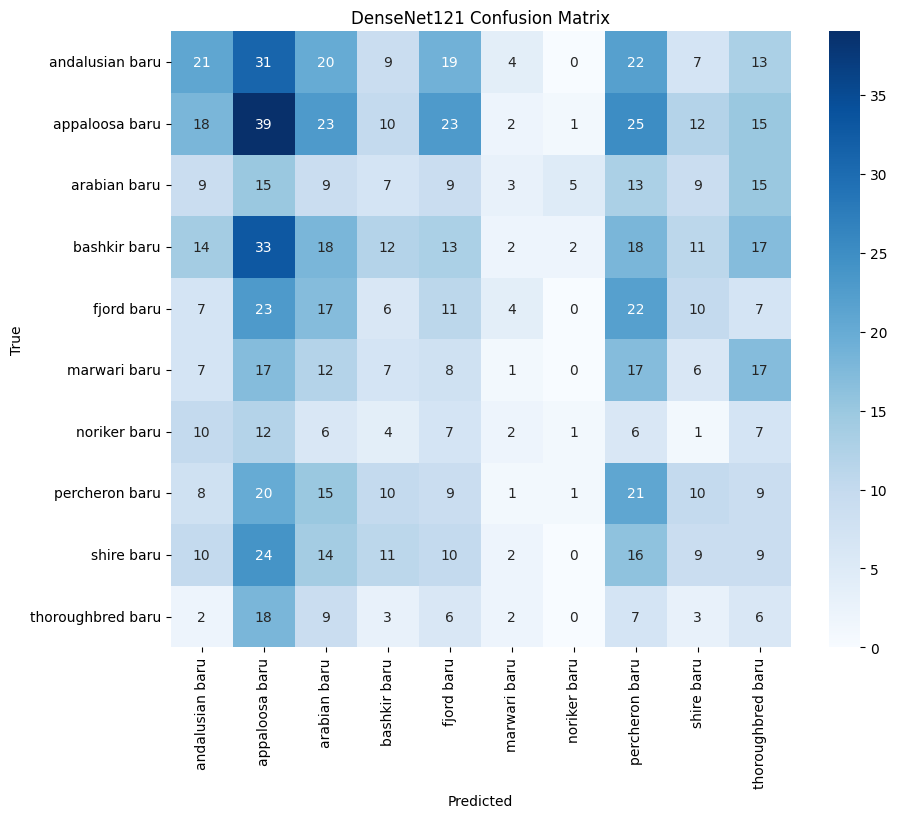

Classification Report:
                    precision    recall  f1-score   support

  andalusian baru       0.20      0.14      0.17       146
   appaloosa baru       0.17      0.23      0.20       168
     arabian baru       0.06      0.10      0.08        94
     bashkir baru       0.15      0.09      0.11       140
       fjord baru       0.10      0.10      0.10       107
     marwari baru       0.04      0.01      0.02        92
     noriker baru       0.10      0.02      0.03        56
   percheron baru       0.13      0.20      0.15       104
       shire baru       0.12      0.09      0.10       105
thoroughbred baru       0.05      0.11      0.07        56

         accuracy                           0.12      1068
        macro avg       0.11      0.11      0.10      1068
     weighted avg       0.12      0.12      0.12      1068



In [30]:
# Evaluate DenseNet121
print("DenseNet121 Evaluation")
evaluate_model(densenet121_model, test_generator, 'DenseNet121')

MobileNetV3 Evaluation
34/34 [==============================] - 7s 206ms/step - loss: 2.3736 - accuracy: 0.0880
MobileNetV3 Test Accuracy: 0.0880
MobileNetV3 Test Loss: 2.3736
34/34 [==============================] - 7s 217ms/step


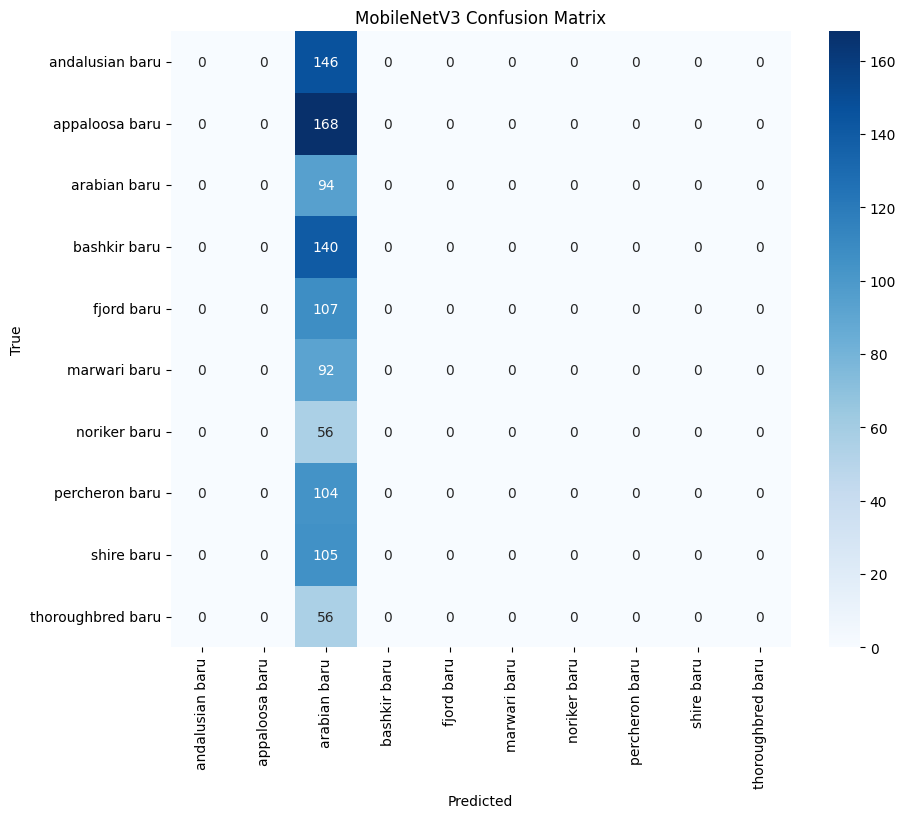

MobileNetV3 Classification Report:
                    precision    recall  f1-score   support

  andalusian baru       0.00      0.00      0.00       146
   appaloosa baru       0.00      0.00      0.00       168
     arabian baru       0.09      1.00      0.16        94
     bashkir baru       0.00      0.00      0.00       140
       fjord baru       0.00      0.00      0.00       107
     marwari baru       0.00      0.00      0.00        92
     noriker baru       0.00      0.00      0.00        56
   percheron baru       0.00      0.00      0.00       104
       shire baru       0.00      0.00      0.00       105
thoroughbred baru       0.00      0.00      0.00        56

         accuracy                           0.09      1068
        macro avg       0.01      0.10      0.02      1068
     weighted avg       0.01      0.09      0.01      1068



In [65]:
# Evaluate MobileNetV3
print("MobileNetV3 Evaluation")
evaluate_model(mobilenetv3_model, test_generator, 'MobileNetV3')

## Conclusion

### Analysist

Based on the evaluation results of DenseNet121, ResNet50, and MobileNetV3 for classifying horse breeds, we can draw several conclusions.

- DenseNet121 achieved an accuracy of 12% and demonstrated slightly better precision and recall for certain classes compared to the other models. Notably, it had higher precision for "andalusian baru" and "appaloosa baru," and better recall for "percheron baru."

- ResNet50 also reached an accuracy of 12%. However, it showed lower precision and recall than DenseNet121 for most classes. For instance, it struggled significantly with the "fjord baru" and "noriker baru" classes, having almost negligible precision and recall.

- MobileNetV3 had the poorest performance with an accuracy of only 10%. Its precision and recall were very low across nearly all classes, except for "shire baru," where it managed to achieve a recall of 100% but with a low precision of 10%. This indicates that while MobileNetV3 could identify "shire baru" instances, it also misclassified a large number of other breeds as "shire baru."


### Summary

- DenseNet121: Best overall performance with the highest precision and recall in several key classes.
ResNet50: Similar accuracy to DenseNet121 but lower overall precision and recall.

- MobileNetV3: Lowest accuracy and generally poor performance across most classes.

Given these results, DenseNet121 stands out as the best model among the three. Its superior precision and recall in multiple classes indicate it is more reliable for this classification task. Although the overall accuracy for both DenseNet121 and ResNet50 is the same, DenseNet121's better handling of individual class predictions makes it the preferred choice.


### Improvements

1. Increase Dataset Size: Expanding the dataset beyond the current 3551 images could provide the models with more diverse examples to learn from, potentially improving the prediction accuracy.

2. Balance Class Distribution: Ensuring an equal representation of each horse subspecies in the dataset can prevent the models from favoring more prevalent classes, thereby enhancing overall accuracy.

3. Fine-tune Hyperparameters: Adjusting parameters like learning rate, batch size, and epochs through systematic tuning can optimize model training, potentially leading to better convergence and higher accuracy.

By implementing these recommendations is expected to improve model performance, increasing both accuracy and reliability in classifying horse subspecies. By addressing these aspects, we aim to develop a more robust and effective model for future classification tasks in this domain.